Massive open online courses (MOOCSs) are free online courses open for everyone to enroll. What Makes MOOCs attractive is the fact that it offers opportunities for people from different walks of life and from differen countries to study "together" and by together that is virtually, at minimal to no cost to students. Schools like University of Maryland University College were among the first univeristies to accept MOOCs for credit, since then more institutions have welcomed the idea of providing online education for free. MOOCs sadly have simply not lived up to their mission to transform education around the world and once again we see how a good free initiative simply does not translate to good results.

In [1]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Read in the datasets

In [3]:
#First dataset
mooc_data = pd.read_csv('mooc.csv')
mooc_data.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,nan,NaN,0,12/19/2012,11/17/2013,nan,9.0,nan,nan,0,nan,1.0
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,nan,NaN,0,2/8/2013,11/17/2013,nan,16.0,nan,nan,0,nan,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,nan,NaN,0,1/1/2013,5/14/2013,42.0,6.0,nan,3.0,0,nan,nan
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,nan,NaN,0,2/18/2013,3/17/2013,70.0,3.0,nan,3.0,0,nan,nan
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,nan,NaN,0.07,1/24/2013,8/3/2013,175.0,9.0,nan,7.0,0,nan,nan


## Data Preprocessing

In [4]:
#split course id and extract institution, course id, year and semester from it
course_details = [course for course in mooc_data['course_id']]

institution= []
course_id= []
year= []

for course in course_details:
    course = course.split('/')
    institution.append(course[0])
    course_id.append(course[1])
    year.append(course[2])        

In [5]:
#Add the newly created lists to the existing dataframe
mooc_data['Institution'] = institution
mooc_data['Course_id'] =  course_id
mooc_data['Year'] = year

#drop unmwanted and duplicate columns from the dataframe
mooc_data = mooc_data.drop(columns=["course_id","roles"])

In [6]:
#Extract semester and year from the year column
seasons = [yr for yr in mooc_data['Year']]
semester = []
year = []
for season in seasons:
    season = season.split('_')
    year.append(season[0])
    if len(season) > 1:
        semester.append(season[1])
    elif len(season) == 1:
        semester.append('N/A')

In [7]:
mooc_data['Year'] = year
mooc_data['Semester'] = semester

In [8]:
#rename all null values as N/A to easily drop them
mooc_data = mooc_data.fillna('N/A')

In [9]:
#Remove rows from columns gender, level of education, Year of birth with N/A
mooc_data = mooc_data.loc[mooc_data['gender'] != 'N/A']
mooc_data = mooc_data.loc[mooc_data['LoE_DI'] != 'N/A']  
mooc_data = mooc_data.loc[mooc_data['YoB'] != 'N/A']

# replace numeric null values  with 0
mooc_data.loc[mooc_data['nevents'] == 'N/A', 'nevents'] = 0
mooc_data.loc[mooc_data['ndays_act'] == 'N/A', 'ndays_act'] = 0
mooc_data.loc[mooc_data['nplay_video'] == 'N/A', 'nplay_video'] = 0
mooc_data.loc[mooc_data['nchapters'] == 'N/A', 'nchapters'] = 0
mooc_data.loc[mooc_data['grade'] == 'N/A', 'grade'] = 0
mooc_data.loc[mooc_data['incomplete_flag'] == 'N/A', 'incomplete_flag'] = 0

In [10]:
mooc_data.head()

,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,Institution,Course_id,Year,Semester
1880,MHxPC130069875,1,1,0,0,India,Secondary,1994.0,m,0,...,26.0,4.0,0,3.0,0,0,HarvardX,CB22x,2013,Spring
1881,MHxPC130114587,1,1,0,0,Other South America,Bachelor's,1990.0,m,0,...,44.0,4.0,0,2.0,0,0,HarvardX,CB22x,2013,Spring
1882,MHxPC130122866,1,1,0,0,Other Europe,Master's,1978.0,m,0,...,32.0,1.0,0,2.0,0,0,HarvardX,CB22x,2013,Spring
1883,MHxPC130470188,1,0,0,0,Other East Asia,Bachelor's,1983.0,m,0,...,0,2.0,0,0,0,1.0,HarvardX,CB22x,2013,Spring
1884,MHxPC130263156,1,1,0,0,Other Europe,Master's,1977.0,m,0,...,37.0,2.0,0,1.0,0,0,HarvardX,CB22x,2013,Spring


In [11]:
#Calculate age from year column up to 2013 
mooc_data['Age'] = pd.Timestamp('2013').year - mooc_data['YoB'] 
mooc_data.head()

,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,Institution,Course_id,Year,Semester,Age
1880,MHxPC130069875,1,1,0,0,India,Secondary,1994.0,m,0,...,4.0,0,3.0,0,0,HarvardX,CB22x,2013,Spring,19.0
1881,MHxPC130114587,1,1,0,0,Other South America,Bachelor's,1990.0,m,0,...,4.0,0,2.0,0,0,HarvardX,CB22x,2013,Spring,23.0
1882,MHxPC130122866,1,1,0,0,Other Europe,Master's,1978.0,m,0,...,1.0,0,2.0,0,0,HarvardX,CB22x,2013,Spring,35.0
1883,MHxPC130470188,1,0,0,0,Other East Asia,Bachelor's,1983.0,m,0,...,2.0,0,0,0,1.0,HarvardX,CB22x,2013,Spring,30.0
1884,MHxPC130263156,1,1,0,0,Other Europe,Master's,1977.0,m,0,...,2.0,0,1.0,0,0,HarvardX,CB22x,2013,Spring,36.0


In [12]:
print(mooc_data.shape)
print(mooc_data.columns)
print(mooc_data.isnull().values.any())

(290948, 23)
Index(['userid_DI', 'registered', 'viewed', 'explored', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'incomplete_flag', 'Institution',
       'Course_id', 'Year', 'Semester', 'Age'],
      dtype='object')
False


### Adding Additional Columns to the dataframe

In [13]:
#Print out unique counts of course_ids in the dataframe
mooc_data['Course_id'].value_counts()

CS50x     143266
ER22x      49293
PH207x     37709
PH278x     35509
CB22x      25171
Name: Course_id, dtype: int64

In [14]:
#Add a new column called course title to the dataframe
mooc_data['Course_title'] = ''

mooc_data.loc[(mooc_data['Course_id'] == 'CB22x'), 'Course_title']= 'The Ancient Greek Hero'
mooc_data.loc[(mooc_data['Course_id'] == 'PH207x'), 'Course_title']= 'Health in Numbers'
mooc_data.loc[(mooc_data['Course_id'] == 'CS50x'), 'Course_title'] = 'Introduction to Computer Science'
mooc_data.loc[(mooc_data['Course_id'] == 'ER22x'), 'Course_title'] = 'Justice'
mooc_data.loc[(mooc_data['Course_id'] == 'PH278x'),'Course_title'] = 'Human Health and Global Environmental Change'

In [15]:
#Add a new column called course subject to the dataframe
mooc_data['Course_subject'] = ''

mooc_data.loc[(mooc_data['Course_id'] == 'CB22x') | (mooc_data['Course_id'] == 'ER22x'), 'Course_subject']= 'Humanities,History,Design,Religion,Education'
mooc_data.loc[(mooc_data['Course_id'] == 'PH207x') | (mooc_data['Course_id'] == 'PH278x'), 'Course_subject']= 'Government,Health,Social sciences'
mooc_data.loc[(mooc_data['Course_id'] == 'CS50x'), 'Course_subject'] = 'Computer Science'

In [16]:
#Reorganize and reorder columns
mooc_data = mooc_data[['userid_DI','Age','gender','final_cc_cname_DI','LoE_DI','Institution','Course_id','Course_title','Course_subject',\
             'Year','registered','viewed','explored','nplay_video','ndays_act','nchapters','nforum_posts','grade','incomplete_flag','certified']]

#Clean up column names
mooc_data.columns = ['Userid','Age','Gender','Country','Education','Institution','Course_id','Course_title','Course_subject',\
                    'Year','Registered','Viewed','Explored','Nplay_video','Ndays_act','Nchapters','Nforum_posts','Grade','Incomplete_flag','Certified']
mooc_data.head()

,Userid,Age,Gender,Country,Education,Institution,Course_id,Course_title,Course_subject,Year,Registered,Viewed,Explored,Nplay_video,Ndays_act,Nchapters,Nforum_posts,Grade,Incomplete_flag,Certified
1880,MHxPC130069875,19.0,m,India,Secondary,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,4.0,3.0,0,0,0,0
1881,MHxPC130114587,23.0,m,Other South America,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,4.0,2.0,0,0,0,0
1882,MHxPC130122866,35.0,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,1.0,2.0,0,0,0,0
1883,MHxPC130470188,30.0,m,Other East Asia,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,0,0,0,2.0,0,0,0,1.0,0
1884,MHxPC130263156,36.0,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,2.0,1.0,0,0,0,0


In [17]:
#Replace 0 and 1 with yes and no in yes or no columns
mooc_data["Certified"] = mooc_data["Certified"].replace({0: 'No', 1:'Yes'})
mooc_data["Explored"] = mooc_data["Explored"].replace({0: 'No', 1:'Yes'})
mooc_data["Registered"] = mooc_data["Explored"].replace({1:'Yes'})

In [18]:
#Summary of unique values in selected columns
users = len(mooc_data['Userid'].unique())
registrations = len(mooc_data['Registered'])
country = len(mooc_data['Country'].unique())
courses = len(mooc_data['Course_title'].unique())
education = len(mooc_data['Education'].unique())
age = len(mooc_data['Age'].unique())
gender = len(mooc_data['Gender'].unique())

df = pd.DataFrame({'Registrations': [registrations],
                   'Number of Userid': [users],
                   'Age':[age],
                   'Number of Countries': [country],
                   'Number of Courses': [courses],
                   'Level of Education':[education],
                   'Gender':[gender]})
df

,Registrations,Number of Userid,Age,Number of Countries,Number of Courses,Level of Education,Gender
0,290948,261151,78,34,5,5,3


## Registrations
#### 1. Course title
Out of all the registrations in the courseware, 49.2% of the students registered for Introudction to Computer Science, 16.9% for Justice, 13% for Health in numbers, 12.2% for Human Health and Global environmental change and finally 8.7% registered for the Ancient Greek Hero. When we break this down by gender, males outnumber females by 106,149 and by course registration, males outnumber females in all course registrations.The goal of MOOCs is to make world class education accessible to all by taking away the price factor.We still see that the United States leads the pack (which is a developed country) rather than the expected countries from the global south.

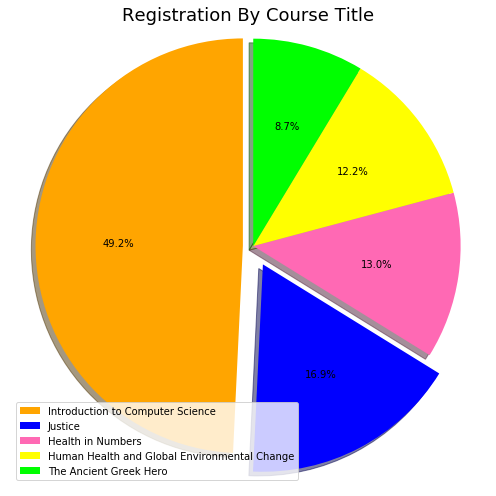

In [19]:
#Registration by course title on edx
registered = mooc_data['Course_title'].value_counts()
registered = registered.reset_index()
registered.columns = ['Course title','Number of registrations']

#PLot this data
plt.figure(figsize=(7,7))
colors =['orange','blue','hotpink','yellow','lime']
explode = (0.05,0.1,0.0,0.0,0.0)
labels = registered['Course title']

plt.pie(registered['Number of registrations'], autopct= '%1.1f%%', 
        colors=colors, startangle=90, explode=explode, shadow=True)

plt.legend(labels, loc="best")
plt.title('Registration By Course Title',fontsize=18)
plt.axis('equal')
plt.tight_layout()

plt.savefig('css/Registration_course.jpeg')

#### 2. Gender

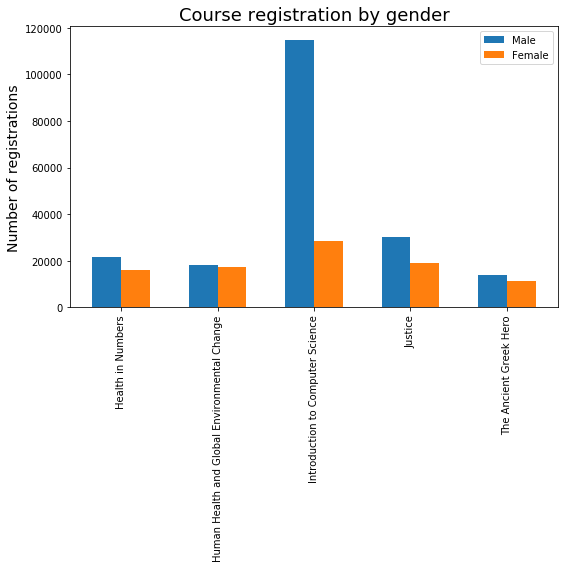

In [20]:
#Registration by gender
gender_registered = mooc_data.groupby(['Gender']).count()['Registered']
gender_registered = gender_registered.reset_index()

#Number of males and females per course title
gender_course_registered = mooc_data.groupby(['Course_title','Gender']).count()['Registered']
g = gender_course_registered.reset_index()

males = g[g['Gender']=='m']
females = g[g['Gender']=='f']
gender_course = pd.merge(males,females, on=('Course_title'), how='inner', suffixes=('_male','_female'))

#Plot this data
fig, ax = plt.subplots(figsize=(8,8))

width = 0.30
labels = gender_course['Course_title']
x = np.arange(len(labels))

rects1 = ax.bar(x - width/2, males['Registered'], width, label='Male')
rects2 = ax.bar(x + width/2, females['Registered'], width, label='Female')
ax.set_title('Course registration by gender',fontsize=18)
ax.set_ylabel('Number of registrations',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
plt.tight_layout()

plt.savefig('css/Course_registration_gender.jpeg')

#### 3. Country

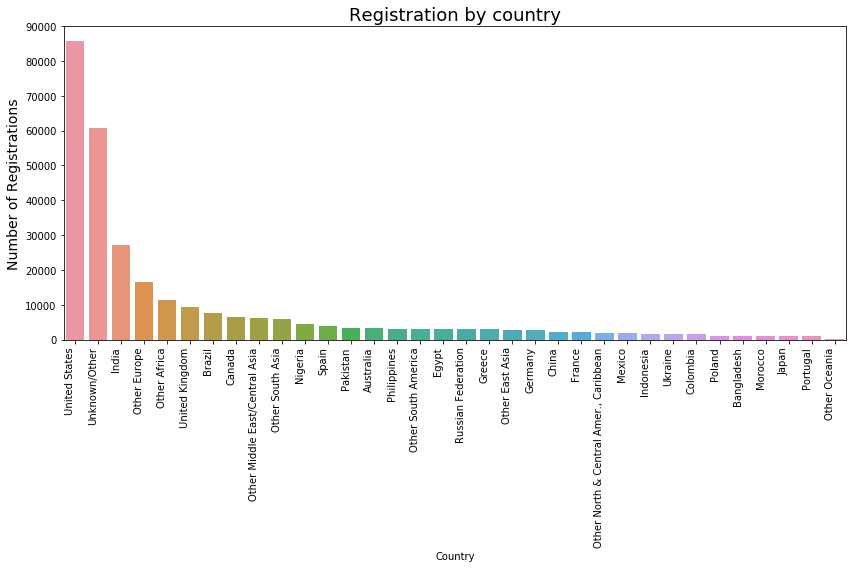

In [21]:
#Course registrations by country
df = mooc_data[['Course_title','Registered','Certified','Education','Country']]

country = df['Country'].value_counts().reset_index()
country.columns=['Country','Number of registrations']

#Plot this data
fig, ax = plt.subplots(figsize=(12,8))
p1 = sns.barplot(x='Country',y='Number of registrations', data=country)
p1.set_title('Registration by country',fontsize=18)
p1.set_ylabel('Number of Registrations', fontsize=14)
p1.set_xticklabels(p1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.tight_layout()

plt.savefig('css/Registration_country.jpeg')

#### 4. Level of education

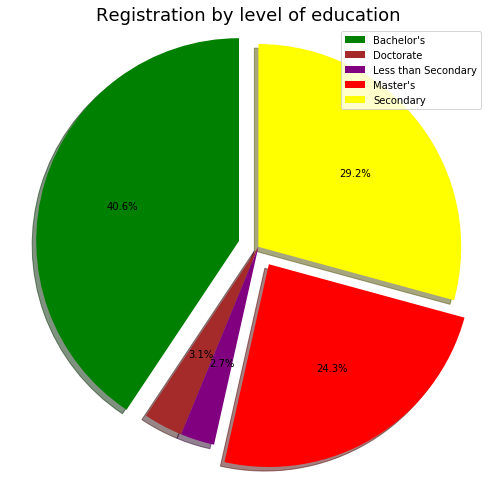

In [22]:
#Registration by level of education LoE
LoE_registration = mooc_data.groupby(['Education']).count()['Registered']
LoE_registration = LoE_registration.reset_index()
LoE_registration

#Plot this data
plt.figure(figsize=(7,7))

labels= LoE_registration['Education']
explode= (0.1,0.0,0.0,0.1,0.0)
colors=['green','brown','purple','red','yellow']

plt.pie(LoE_registration['Registered'], autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Registration by level of education', fontsize=18)
plt.legend(labels,loc='best')
plt.axis('equal')
plt.tight_layout()

plt.savefig('css/registration_by_LoE.jpeg')
#68% of all studnets who registered for the courseware have either bachelors, masters or doctorate degrees

#### 5. Age

Millenials and gen z represents 78.81167768810921 of all student enrollnments


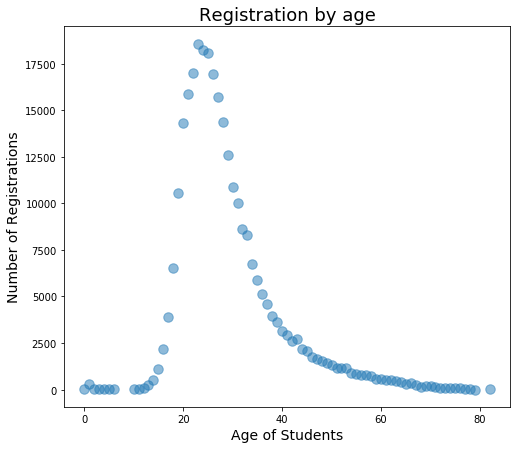

In [23]:
#Registration by age
age_registrations = mooc_data.groupby(['Age']).count()['Registered']
age_registrations = age_registrations.reset_index()
age_registrations

#Number of students from 16 to 34 millenials and gen z
prime_age = mooc_data.loc[(mooc_data['Age'] >= 16) & (mooc_data['Age'] < 35)]
len(prime_age)

#Student percentage who fall into the prime age category
prime_age_percent = (len(prime_age)/registrations)*100
print(f'Millenials and gen z represents {prime_age_percent} of all student enrollnments')

#Plot this data
plt.figure(figsize=(8,7))
plt.scatter(x='Age', y='Registered', data=age_registrations, marker='o', s= 90, alpha=0.5)
plt.xlabel('Age of Students',fontsize=14)
plt.ylabel('Number of Registrations',fontsize=14)
plt.title('Registration by age',fontsize=18)

plt.savefig('css/Student_registration_by_age.jpeg')

#### 6. Year

In [24]:
#Registration by year 2012 
first_year = mooc_data.loc[mooc_data['Year'] == '2012']
print(len(first_year))

#Registration by 2013
second_year = mooc_data.loc[mooc_data['Year'] == '2013']
print(len(second_year))

#change in percentage by year
year_change = len(first_year) - len(second_year)
year_change_percent = round(year_change/len(first_year) *100,2)
year_change_percent

180975
109973


39.23


### Course Completion
Out of the 290948 students who registered for the courseware, only 65,261 completed the courseware representing 22.4% of students.


### Certifications (course title)
Of the 290948 students who registered for these courses only 5728 students were certified, only 2% of students received certifications. Out of 143,266 students who registered for Introduction to Computer Science, only 1063 received certifications representing 1%. Out of 49,293 students who registered for Justice, 1970 received certifications representing 4%. Out of 37709 students who registered for Health in numbers, 1739 received certifications representing 5%.Out of the 35509 students who registered for Human health and global environmental change, 635 received certifications representing 2%.Out of the 25171 students who registered for the Ancient Greek hero,321 received certifications representing 1%.

In [25]:
#How many students completed the courseware int he first two years 2012,2013
course_completed = mooc_data[mooc_data['Incomplete_flag']== 1]
print(len(course_completed))

course_completed_percentage = round(len(course_completed)/registrations*100,2)
course_completed_percentage

65261


22.43

In [26]:
df2 = mooc_data['Certified'].value_counts()
df2 = df2.reset_index()
df2

,index,Certified
0,No,285220
1,Yes,5728


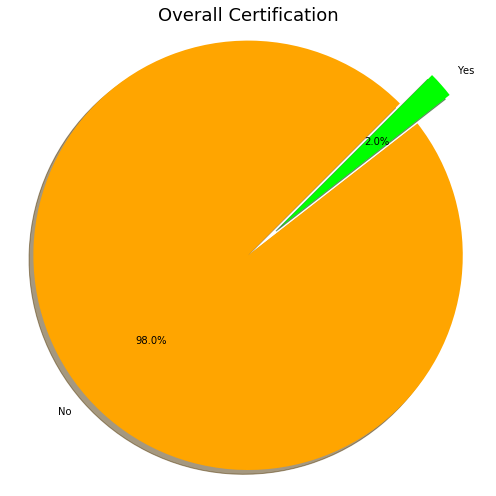

In [27]:
#Plot this data
plt.figure(figsize=(7,7))

labels=df2['index']

explode = (0, 0.2)
colors=['orange','lime']
plt.pie(df2['Certified'],
        autopct='%1.1f%%',
        labels=labels,
        explode=explode,
        shadow=True,
        colors=colors,
        startangle=45)

plt.title('Overall Certification',fontsize=18)
plt.axis('equal')
plt.tight_layout()

plt.savefig('css/overall_certification.jpeg')

## Certification analysis by demographics
### 1. Course title

In [28]:
#How many people were certified by gender,country of origin, level of education 
df = mooc_data[['Course_title','Registered','Certified','Age','Education','Country']]

#Give me all courses in which students received certification
plot_df1 = df.loc[df['Certified'] =='Yes',['Course_title']]
plot_df1= plot_df1.value_counts().reset_index()
plot_df1.columns =['Course title','Number of certifications']

merge_df1 = pd.merge(registered, plot_df1, how='inner', on='Course title')
percent_certified = (merge_df1['Number of certifications'] / merge_df1['Number of registrations']) * 100
merge_df1['% certified'] = percent_certified
merge_df1

,Course title,Number of registrations,Number of certifications,% certified
0,Introduction to Computer Science,143266,1063,0.7
1,Justice,49293,1970,4.0
2,Health in Numbers,37709,1739,4.6
3,Human Health and Global Environmental Change,35509,635,1.8
4,The Ancient Greek Hero,25171,321,1.3


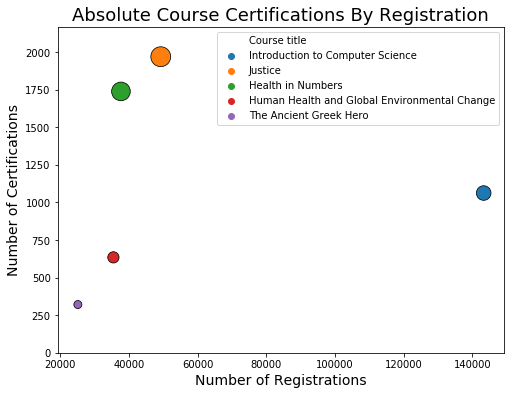

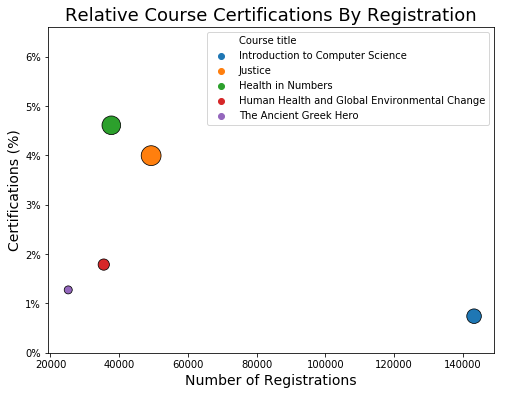

In [29]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8,6))
#Absolute certifications by course registration
x = merge_df1['Number of registrations']
y = merge_df1['Number of certifications']
s = merge_df1['Number of certifications'] /5
colors = ['orange','blue','hotpink','yellow','lime']
p2 = sns.scatterplot(x, y, s=s, hue=merge_df1['Course title'],edgecolor='black')
p2.set_title('Absolute Course Certifications By Registration',fontsize=18)
p2.set_ylabel('Number of Certifications',fontsize=14)
p2.set_xlabel('Number of Registrations',fontsize=14)
p2.set_ylim(0, max(y)+200)
plt.savefig('css/absolute_course_certification.jpeg')


#Relative certifications by course registration
plt.figure(figsize=(8,6))
y_rel = merge_df1['% certified']
p3 = sns.scatterplot(x, y_rel, s=s, hue=merge_df1['Course title'],edgecolor='black')
p3.set_title('Relative Course Certifications By Registration',fontsize=18)
p3.set_ylabel('Certifications (%)',fontsize=14)
p3.set_xlabel('Number of Registrations',fontsize=14)
p3.set_ylim(0, max(y_rel)+ 2)
p3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))

plt.savefig('css/relative_course_certification.jpg')

### 2. Country

In [30]:
#Countries by certifications
overall_certified = mooc_data[mooc_data['Certified']=='Yes']

#Return all country of origin where certified ==yes
plot_df2 = df.loc[df['Certified'] =='Yes',['Country']]
plot_df2 = plot_df2.value_counts().reset_index()
plot_df2.columns = ['Country','Number of certifications']

#merge country df with plot_df2 to calculate relaive certification as a percentage of enrollnment
plot_df2 = pd.merge(country,plot_df2, how='inner', on='Country')
percent_certified = (plot_df2['Number of certifications']/plot_df2['Number of registrations'])*100
plot_df2['% certified'] = percent_certified

#sort in descending order
plot_df2= plot_df2.sort_values('% certified', ascending=False)
top_nine = plot_df2.iloc[0:9,:]
top_nine_total = top_nine['Number of certifications'].sum()

#what is the percentage of the top 9 against overall certifications
percent = round(top_nine_total/ len(overall_certified) * 100,2)
percent

45.22

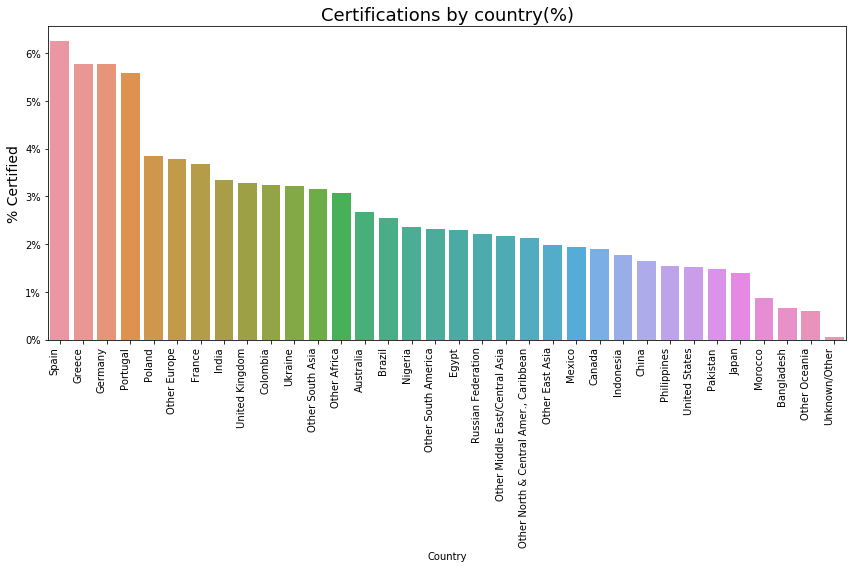

In [31]:
#Plot countries by certification
fig, ax = plt.subplots(figsize=(12,8))
p4 = sns.barplot(x='Country',y='% certified', data=plot_df2)
p4.set_title('Certifications by country(%)',fontsize=18)
p4.set_ylabel('% Certified', fontsize=14)
p4.set_xticklabels(p4.get_xticklabels(), rotation=90, horizontalalignment='right')
p4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
plt.tight_layout()

plt.savefig('css/certification_country.jpeg')

### 3. Level of education
We see that about 73% of the students who completed the courseware and received certification already have a bachelor's, master's or doctorate degree.This shows that students accessing the courseware regard it merely as a resource to fill in gaps or perhaps suplement skills they already learnt in a four year traditional institution.

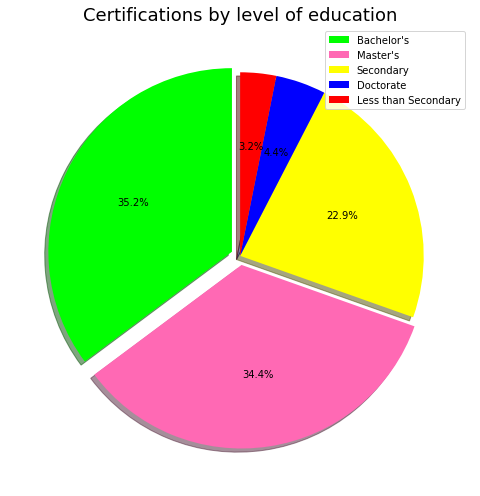

In [32]:
#Filter certification by level of education
LoE_certified  = mooc_data[(mooc_data['Certified'] == 'Yes')]

#Give me the counts of certification by level of education
LoE = LoE_certified['Education'].value_counts()
LoE = LoE.reset_index()
LoE

#plot this data
plt.figure(figsize=(7,7))
colors=['lime','hotpink','yellow','blue','red']
explode= (0.05,0.05,0.0,0.0,0.0)
labels = LoE['index']

plt.pie(LoE['Education'], autopct= '%1.1f%%', 
        colors=colors, startangle=90, explode=explode,shadow=True)

plt.title('Certifications by level of education',fontsize=18)
plt.legend(labels, loc="best")
plt.tight_layout()

plt.savefig('css/certification_LoE.jpeg')

#### 4. Age

In [33]:
certified= mooc_data.loc[mooc_data['Certified'] =='Yes']
certified

num_of_cert_age = certified.groupby(['Age']).count()['Certified']
num_of_cert_age = num_of_cert_age.reset_index()


#Number of cert between millenials and gen z
highest_cert_age = num_of_cert_age.loc[(num_of_cert_age['Age']>= 16)& (num_of_cert_age['Age']< 31)]
sum_cert_age = highest_cert_age['Certified'].sum()

cert_age_percent = round(sum_cert_age/len(certified)*100,2)
cert_age_percent

66.72

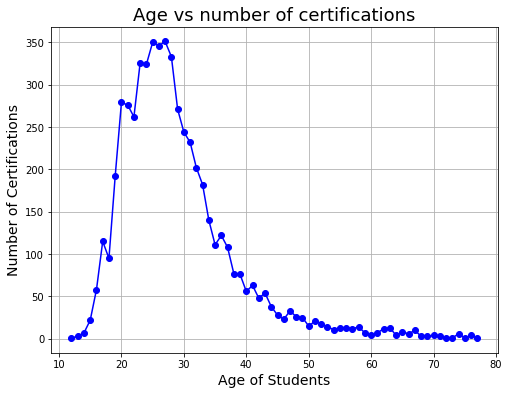

In [34]:
#Plot this data
plt.figure(figsize=(8,6))

plt.plot('Age','Certified', data=num_of_cert_age, marker='o', c='blue')
plt.title('Age vs number of certifications', fontsize=18)
plt.xlabel('Age of Students',fontsize=14)
plt.ylabel('Number of Certifications',fontsize=14)
plt.grid(True)

plt.savefig('css/num_certifications_age.jpeg')

### Diagnosis and recommendations

In [35]:
#Number of curse chapter(s) and number of certifications
#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group number of days students interacted with the courseware and the number of certifications
num_of_chapters_cert = certified.groupby(['Nchapters']).count()['Certified']
num_of_chapters_cert = num_of_chapters_cert.reset_index()

#Number of chapters with the highest certification
max = num_of_chapters_cert.max()

#Give me the num_of chapters correspondingto the highest certification
optimal_num_chapters = num_of_chapters_cert.loc[(num_of_chapters_cert['Certified']== 969),:]
optimal_num_chapters

,Nchapters,Certified
11,12.0,969


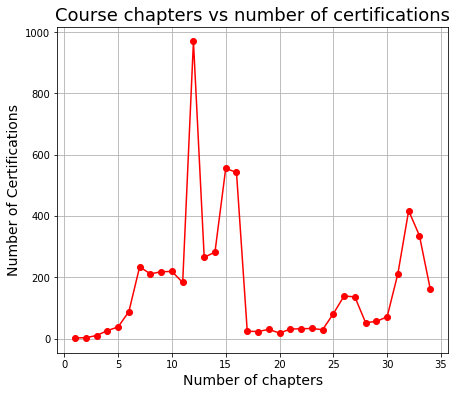

In [59]:
#Plot this data
plt.figure(figsize=(7,6))
plt.plot('Nchapters','Certified', data=num_of_chapters_cert, marker='o', c='red')
plt.title('Course chapters vs number of certifications', fontsize=18)
plt.xlabel('Number of chapters',fontsize=14)
plt.ylabel('Number of Certifications',fontsize=14)
plt.grid(True)

plt.savefig('css/num_chapters_certification.jpeg')

In [60]:
#Number of interactive days with the courseware and out of these days how many were certified
interactive_days = mooc_data['Ndays_act'].value_counts()

#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group number of days students interacted with the courseware and the number of certifications
unique_days_certified = certified.groupby(['Ndays_act']).count()['Certified']
unique_days_certified = unique_days_certified.reset_index()

# 2 weeks to 8 weeks
optimal_num_days = unique_days_certified.loc[(unique_days_certified['Ndays_act']>=14) & (unique_days_certified['Ndays_act']< 57)]
total_sum = optimal_num_days['Certified'].sum()

#straucture courses to run between 2 weeks to 8 weeks
most_impactful_days = round(total_sum/len(certified)*100, 2)
most_impactful_days

70.5

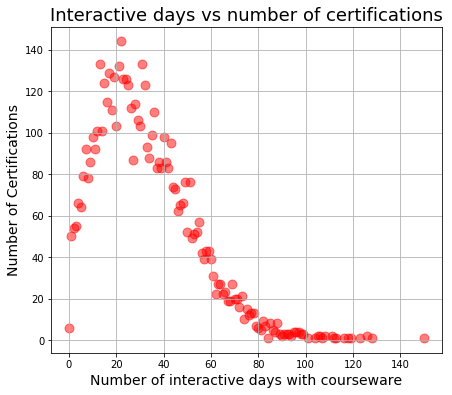

In [61]:
#Plot this data
plt.figure(figsize=(7,6))
plt.scatter('Ndays_act', 'Certified', data=unique_days_certified, s=80, c='red', alpha=0.5)
plt.title('Interactive days vs number of certifications',fontsize=18)
plt.xlabel('Number of interactive days with courseware',fontsize=14)
plt.ylabel('Number of Certifications',fontsize=14)
plt.grid(True)

plt.savefig('css/unique_interactive_days_certifications.jpeg')

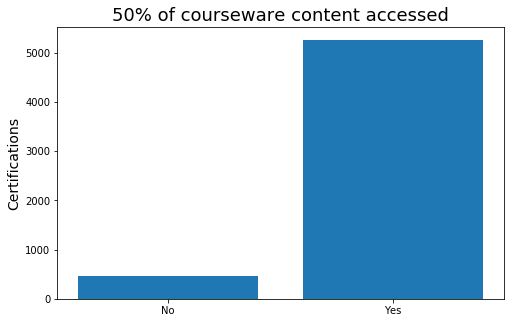

In [40]:
#Students who explored (acessed more than 50% of the courseware) and the relationship with certification

#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group by those who explored courseware and number of certifications
more_than_50percent = certified.groupby(['Explored']).count()['Certified']
more_than_50percent= more_than_50percent.reset_index()

x = more_than_50percent['Explored']
y = more_than_50percent['Certified']

#Plot this data
plt.figure(figsize=(8,5))
p5 = plt.bar(x, y)
plt.title('50% of courseware content accessed',fontsize=18)
plt.ylabel('Certifications',fontsize=14)

plt.savefig('css/50%_or_more_of_course_certification.jpeg')

## Predictions

In [41]:
mooc_data.head()

,Userid,Age,Gender,Country,Education,Institution,Course_id,Course_title,Course_subject,Year,Registered,Viewed,Explored,Nplay_video,Ndays_act,Nchapters,Nforum_posts,Grade,Incomplete_flag,Certified
1880,MHxPC130069875,19.0,m,India,Secondary,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,No,1,No,0,4.0,3.0,0,0,0,No
1881,MHxPC130114587,23.0,m,Other South America,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,No,1,No,0,4.0,2.0,0,0,0,No
1882,MHxPC130122866,35.0,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,No,1,No,0,1.0,2.0,0,0,0,No
1883,MHxPC130470188,30.0,m,Other East Asia,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,No,0,No,0,2.0,0,0,0,1.0,No
1884,MHxPC130263156,36.0,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,No,1,No,0,2.0,1.0,0,0,0,No


In [42]:
#Can we predict if a student will be certified or not
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Setting X and y
X = mooc_data[['Age','Gender','Country','Education','Course_id','Year','Registered','Explored','Nplay_video','Nforum_posts','Ndays_act','Nchapters']]
y = mooc_data[['Certified']]

X = pd.get_dummies(data=X, drop_first=True)
y = pd.get_dummies(data=y, drop_first=True)

In [43]:
#Split data into training and trsting set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

#Logistic regression
model= LogisticRegression()

#Training data
model.fit(X_train, y_train)

#Test it on untrained data
y_predicted = model.predict(X_test)


In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
cnf_matrix

array([[85180,   387],
       [  636,  1082]], dtype=int64)

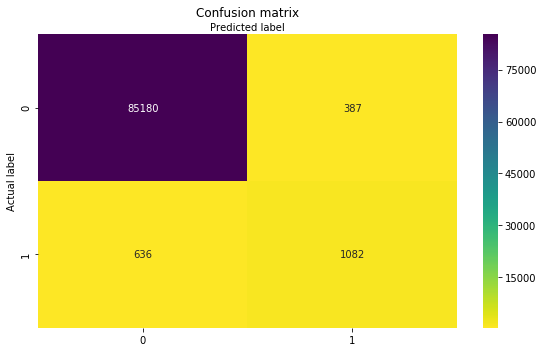

In [45]:
#visualize confusion matrix
class_names=[0, 1]
fig, ax = plt.subplots(figsize=(8,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='viridis_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.savefig('css/log_model.jpeg')

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted)) 
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.9882797731568999
Precision: 0.7365554799183118
Recall: 0.629802095459837


In [ ]:
## Conclusion